In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# Classification with a Single-Layer Perceptron

## Generate Linearly-Separable Data

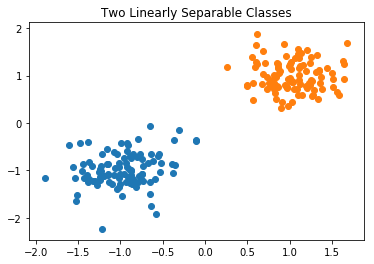

In [3]:
%matplotlib inline
def generate_data(mean, cov, N):
    x = np.random.multivariate_normal(mean, cov, N)
    return x

# Generate data for each class
class0 = generate_data([-1, -1], [[0.1, 0],[0, 0.1]], 100)
class1 = generate_data([1, 1], [[0.1, 0],[0, 0.1]], 100)

# Add targets to classes
neg = np.zeros((100,1))
pos = np.ones((100,1))
class0 = np.concatenate((class0, neg), axis=1)
class1 = np.concatenate((class1, pos), axis=1)

# Shuffle the data
data = np.concatenate((class0, class1), axis=0)
np.random.shuffle(data)

# Plot the data
plt.scatter(class0[:,0],class0[:,1])
plt.scatter(class1[:,0],class1[:,1])
plt.title("Two Linearly Separable Classes")





## Classification with a single-layer perceptron

Apply and compare both perceptron learning and Delta learning rules on the generated dataset. Please try also to compare sequential with a batch learning approach. Comparisons can be made using some evaluation metrics that could be the number or ratio of misclassified examples at each epoch (iteration through the entire dataset). How quickly do the algorithms converge? Please plot the learnign curves for each variant of learning. You could also visualise the learning process by plotting a separating line (decision boundary) after each epoch of training (for that you could generate a sort of animation; you are not required though to demonstrate this animation to the teaching assistant).

In [4]:
# Generate weights in an NxM matrix where N is number of inputs and
# M is number of outputs. Weights are small with a mean of 0. Extra
# Column is added to weights for the bias
def generate_Weights(inputDim, outputDim):
    # Add 1 to the input for bias
    W = np.random.randn(outputDim, inputDim+1)/100
    
    return W


# Add bias to the input matrix
def make_Input(data):
    X = data[:,:2]
    ones = np.ones(len(X))
    ones = ones.reshape(-1,1)
    X = np.concatenate((X, ones), axis=1)
    return X.T

def Output(data):
    T = data[:,2]
    T = T.reshape((1,-1))
    return T
    



### Perceptron Learning

In [11]:
#np.random.seed(5)

def classifySamples(weights, inputs):
    output = weights.dot(inputs)
    #output = np.where(output>0,1,0)
    output = expit(output)
    return output



def Update(targets, inputs, rate, rule, weights, outputs=None):
    if (rule == "perceptron"):
        delW = -rate*(outputs-targets).dot(inputs.T)
    elif (rule == "delta"):
        delW = -rate*(weights.dot(inputs)-targets).dot(inputs.T)
    weights += delW
    return weights


def trainSeq(data, rate, rule):
    W = generate_Weights(2,1)
    
    for j in range(10):
        for i in range(np.shape(data)[0]):
            if (i==0):
                np.random.shuffle(data)
                X = make_Input(data)
                T = Output(data)
                Y = classifySamples(W,X)
            target = T[:,i].reshape(-1,1)
            input = X[:,i].reshape(-1,1)
            output = Y[:,i].reshape(-1,1)
            W = Update(target,input,rate,rule,W,output)
            #print("Weights", W)
            Newoutput = classifySamples(W, X)
            err = np.sum(np.abs(Newoutput - T))
            errRate = err/np.shape(T)[1]*100


            print("Sample", i, "ErrorRate", errRate)
            if(err == 0):
                break
        if(err == 0):
            break
    return W
        
        
    
#trainSeq(data, 0.001, "delta")

    
def trainBatch(epochs, data, rate, rule):
    W = generate_Weights(2,1)
    X = make_Input(data)
    T = Output(data)
    Y = classifySamples(W,X)
    for i in range(epochs):
        W = Update(T, X, rate, rule, W, Y)
        Newoutput= classifySamples(W,X)
        err = np.sum(Newoutput - T)
        errRate = err/np.shape(T)[1]*100
        
        print("Epoch", i, "ErrorRate", errRate)
        if(err == 0):
            break
    return W

trainBatch(50, data, 0.01, "delta")

Epoch 0 ErrorRate 16.6583491424965
Epoch 1 ErrorRate 97.86484602137551
Epoch 2 ErrorRate 0.11049355918765211
Epoch 3 ErrorRate 99.99997516334007
Epoch 4 ErrorRate 1.8675022919213102e-15
Epoch 5 ErrorRate 100.0
Epoch 6 ErrorRate 7.568876440155974e-153
Epoch 7 ErrorRate 100.0
Epoch 8 ErrorRate 0.0


array([[8267.53669058, 8210.54611401,  281.64258971]])